In [1]:
import psutil
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
from statistics import mean
import subprocess
import threading

In [2]:
ram_usage, cpu_usage = [], []
flg_monitoring = True

def clean_usages():
    global ram_usage, cpu_usage
    ram_usage = []
    cpu_usage = []

def monitorear_recursos(interval=1):
  global flg_monitoring
  global ram_usage, cpu_usage
  clean_usages()
  flg_monitoring = True
  while flg_monitoring:
    # Información de GPU
    #gpus = GPUtil.getGPUs()
    #gpu_info = []
    #for gpu in gpus:
    #    gpu_usage.append(gpu.load * 100)
    #    gpu_ram_usage.append(gpu.memoryUsed)
    #power_usage.append(get_gpu_power())
    # Información de CPU y RAM
    cpu_usage_now = psutil.cpu_percent(interval=0.1)
    cpu_usage.append(cpu_usage_now)
    ram_info = psutil.virtual_memory()
    ram_usage.append(ram_info.used)
    # power cpu
    # Pausar entre iteraciones
    time.sleep(interval)


def plot_usages(path):
    global ram_usage, cpu_usage
    print(f"max cpu: {max(cpu_usage)}, avg cpu: {mean(cpu_usage)}")
    print(f"max ram: {max(ram_usage)}, avg ram: {mean(ram_usage)}")
    fig = plt.figure(figsize=(20, 16))
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 0.5])  # Tres filas, dos columnas

    # Primeras cuatro gráficas en una cuadrícula 2x2
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])

    # Graficar cada serie de datos
    ax1.plot(cpu_usage)
    ax1.set_title('Uso de CPU')
    ax1.set_xlabel('Tiempo (segundos)')
    ax1.set_ylabel('Uso de CPU (%)')

    ax2.plot(ram_usage)
    ax2.set_title('Uso de RAM')
    ax2.set_xlabel('Tiempo (segundos)')
    ax2.set_ylabel('Uso de RAM (bytes)')

    plt.tight_layout()  # Ajusta los espacios automáticamente
    plt.show()

    # save figure in path
    plt.savefig(path)
    all_values = {
        "cpu_usage": cpu_usage,
        "avg_cpu_usage": mean(cpu_usage),
        "max_cpu_usage": max(cpu_usage),
        "ram_usage": ram_usage,
        "avg_ram_usage": mean(ram_usage),
        "max_ram_usage": max(ram_usage),
    }
    plt.show()
    return all_values

In [3]:
def inference():
    print("Iniciando inferencia")
    subprocess.run(["./example", "./my_larq_model.tflite", "../test_batch.bin", "10"])
    print("Inferencia finalizada")

Iniciando inferencia
Primera imagen, etiqueta: 3, primer pixel: 0.619608


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Se han cargado 10 muestras.
Imagen 0: Etiqueta real = 3, Predicción = 8, tiempo: 0.275334s
Imagen 1: Etiqueta real = 8, Predicción = 1, tiempo: 0.258337s
Imagen 2: Etiqueta real = 8, Predicción = 0, tiempo: 0.436828s
Imagen 3: Etiqueta real = 0, Predicción = 8, tiempo: 0.270537s
Imagen 4: Etiqueta real = 6, Predicción = 6, tiempo: 0.256029s
Imagen 5: Etiqueta real = 6, Predicción = 9, tiempo: 0.445411s
Imagen 6: Etiqueta real = 1, Predicción = 0, tiempo: 0.257334s
Imagen 7: Etiqueta real = 6, Predicción = 9, tiempo: 0.256420s
Imagen 8: Etiqueta real = 3, Predicción = 6, tiempo: 0.256897s
Imagen 9: Etiqueta real = 1, Predicción = 9, tiempo: 0.256803s
Predicciones correctas: 1 de 10
Precisión: 10.00%
Inferencia finalizada
Tiempo de inferencia: 2.9988150596618652
max cpu: 52.4, avg cpu: 48.166666666666664
max ram: 2879827968, avg ram: 2874216448


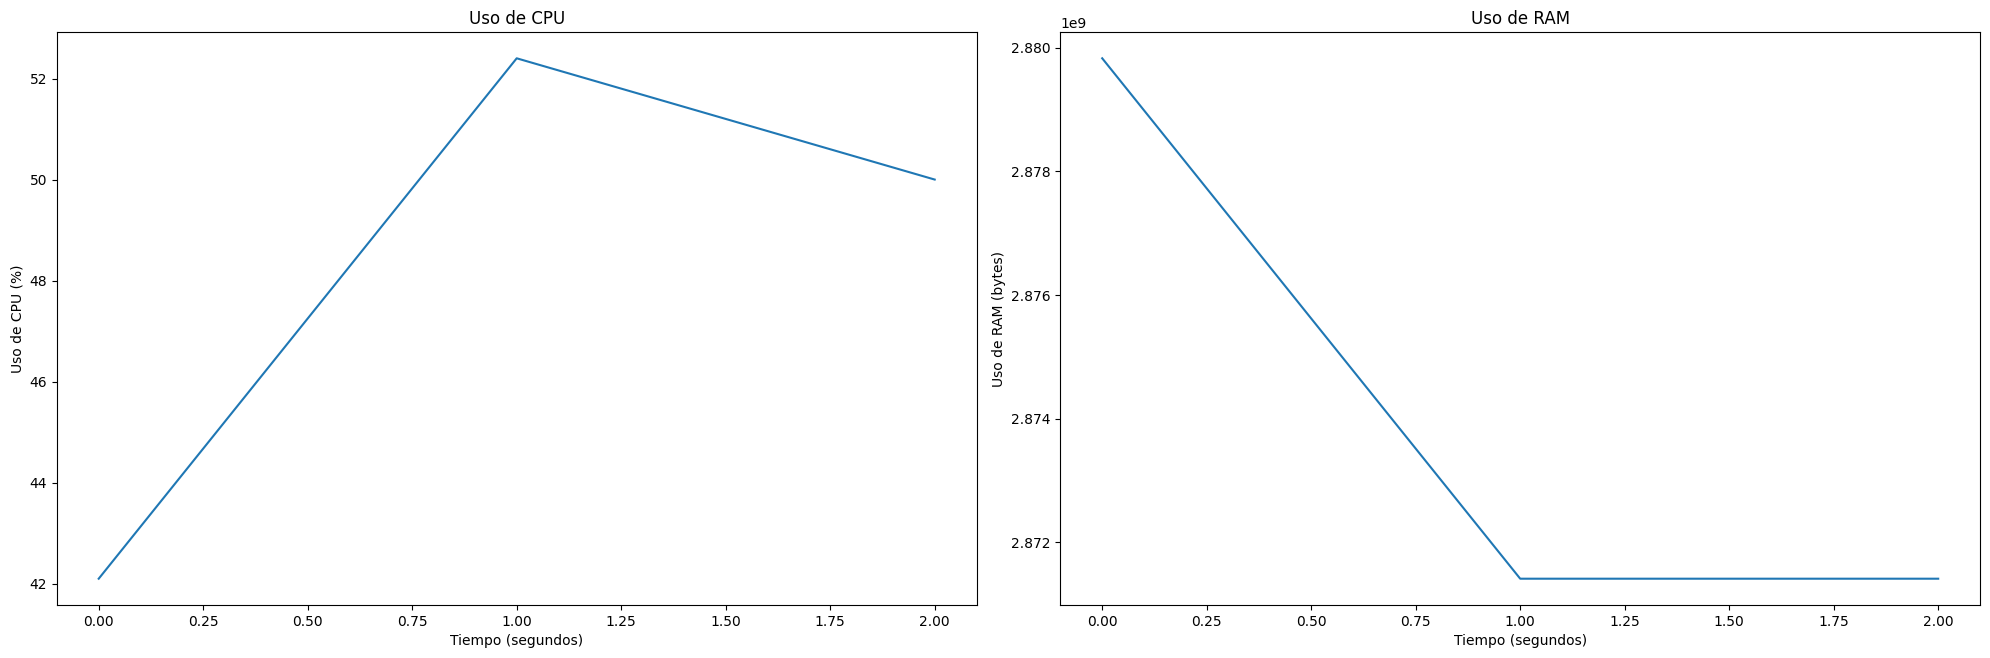

<Figure size 640x480 with 0 Axes>

{'cpu_usage': [42.1, 52.4, 50.0],
 'avg_cpu_usage': 48.166666666666664,
 'max_cpu_usage': 52.4,
 'ram_usage': [2879827968, 2871410688, 2871410688],
 'avg_ram_usage': 2874216448,
 'max_ram_usage': 2879827968}

In [4]:
monitor_thread = threading.Thread(target=monitorear_recursos)
inferece_thread = threading.Thread(target=inference)
monitor_thread.start()
start = time.time()
inferece_thread.start()
inferece_thread.join()
end = time.time()
print(f"Tiempo de inferencia: {end - start}")
flg_monitoring = False
plot_usages("./usages")
